In [2]:
##FEATURE BASED OPINION MINING ON STUDENT FEEDBACK

#READING THE DATA IN A CSV FILE

import pandas as pd
data=pd.read_csv('C:\\Users\\SUSHMI REDDY\\Desktop\\feedback_data.csv')
print(len(data))
data.head()


185


,teaching,coursecontent,Examination,labwork,library,extracurricular
0,teacher are punctual but they should also give...,content of courses are average,examination pattern is good,"not satisfactory, lab work must include latest...",library facilities are good but number of book...,extracurricular activities are excellent and p...
1,Good,Not good,Good,Good,Not good,Good
2,Excellent lectures are delivered by teachers a...,All courses material provide very good knowled...,Exam pattern is up to the mark and the Cgpa de...,Lab work is properly covered in the labs by th...,Library facilities are excellent in terms of g...,Extra curricular activities also help students...
3,Good,Content of course is perfectly in line with th...,Again the university tests students of their a...,Good,Its the best thing i have seen in this univers...,Complete wastage of time. Again this opinion i...
4,teachers give us all the information required ...,content of courses improves my knowledge,examination pattern is good,practical work provides detail knowledge of th...,library has huge collection of books from diff...,extracurricular activities increases mental an...


In [3]:
sushmi=pd.read_csv('C:\\Users\\SUSHMI REDDY\\Desktop\\feedback_data.csv')
sushmi.head()

#SEEING WHETHER THERE ARE ANY MISSING VALUES IN THE DATA

print(data.isnull().sum())

teaching           0
coursecontent      0
Examination        0
labwork            0
library            0
extracurricular    0
dtype: int64


# data cleaning

In [5]:
# REMOVING THE SPECIAL CHARACTERS FROM THE DATA AND REPLACING THEM WITH NULL
columns=list(data)
for i in columns:
    print(data[i].str.replace('[^\w\s]', ''))


0      teacher are punctual but they should also give...
1                                                  Good 
2      Excellent lectures are delivered by teachers a...
3                                                   Good
4      teachers give us all the information required ...
                             ...                        
180    intraction is good and leacture delivery also ...
181    all the given terms are good regarding the uni...
182    All the terms are good regarding the universit...
183    Some of the teacher are un experienced Also th...
184                                     IT IS GOING GOOD
Name: teaching, Length: 185, dtype: object
0                         content of courses are average
1                                               Not good
2      All courses material provide very good knowled...
3      Content of course is perfectly in line with th...
4               content of courses improves my knowledge
                             ...             

In [6]:
##IMPORTING STOP WORDS 
import nltk
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
print(stop_words)
len(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

179

In [7]:
df=pd.DataFrame(data)
df.head()

,teaching,coursecontent,Examination,labwork,library,extracurricular
0,teacher are punctual but they should also give...,content of courses are average,examination pattern is good,"not satisfactory, lab work must include latest...",library facilities are good but number of book...,extracurricular activities are excellent and p...
1,Good,Not good,Good,Good,Not good,Good
2,Excellent lectures are delivered by teachers a...,All courses material provide very good knowled...,Exam pattern is up to the mark and the Cgpa de...,Lab work is properly covered in the labs by th...,Library facilities are excellent in terms of g...,Extra curricular activities also help students...
3,Good,Content of course is perfectly in line with th...,Again the university tests students of their a...,Good,Its the best thing i have seen in this univers...,Complete wastage of time. Again this opinion i...
4,teachers give us all the information required ...,content of courses improves my knowledge,examination pattern is good,practical work provides detail knowledge of th...,library has huge collection of books from diff...,extracurricular activities increases mental an...


In [7]:
##CALCULATING THE NUMBER OF STOP WORDS IN EACH SENTENCE
columns=list(df)
for i in columns:
        print(df[i].apply(lambda x: len([word for word in x.split() if word in stop_words])))

0       8
1       0
2       6
3       0
4       4
       ..
180     6
181     4
182     3
183    15
184     0
Name: teaching, Length: 185, dtype: int64
0      2
1      0
2      2
3      9
4      2
      ..
180    5
181    2
182    5
183    7
184    0
Name: coursecontent, Length: 185, dtype: int64
0       1
1       0
2      25
3       8
4       1
       ..
180     6
181     2
182     5
183     3
184     0
Name: Examination, Length: 185, dtype: int64
0      1
1      0
2      9
3      0
4      1
      ..
180    3
181    1
182    2
183    4
184    0
Name: labwork, Length: 185, dtype: int64
0       4
1       0
2       6
3      10
4       3
       ..
180     0
181     8
182     1
183     4
184     0
Name: library, Length: 185, dtype: int64
0      3
1      0
2      9
3      6
4      1
      ..
180    4
181    0
182    5
183    6
184    0
Name: extracurricular, Length: 185, dtype: int64


In [8]:
## REMOVING ALL THE STOP WORDS

columns=list(df)
for i in columns:
    df[i]=df[i].apply(lambda x:' '.join(word for word in x.split() if word not in stop_words))
        

In [9]:
##we got a dataframe without stop words
df.head()

,teaching,coursecontent,Examination,labwork,library,extracurricular
0,teacher punctual also give us practical knowle...,content courses average,examination pattern good,"satisfactory, lab work must include latest tec...",library facilities good number books less,extracurricular activities excellent provides ...
1,Good,Not good,Good,Good,Not good,Good
2,Excellent lectures delivered teachers teachers...,All courses material provide good knowledge de...,Exam pattern mark Cgpa depends various marks d...,Lab work properly covered labs faculty evaluat...,Library facilities excellent terms good techni...,Extra curricular activities also help students...
3,Good,Content course perfectly line teaching philoso...,Again university tests students ability memori...,Good,"Its best thing seen university,albeit behaviou...",Complete wastage time. Again opinion strictly ...
4,teachers give us information required improve ...,content courses improves knowledge,examination pattern good,practical work provides detail knowledge theor...,library huge collection books different authors,extracurricular activities increases mental ph...


In [9]:
##data with stop words
sushmi.head()

,teaching,coursecontent,Examination,labwork,library,extracurricular
0,teacher are punctual but they should also give...,content of courses are average,examination pattern is good,"not satisfactory, lab work must include latest...",library facilities are good but number of book...,extracurricular activities are excellent and p...
1,Good,Not good,Good,Good,Not good,Good
2,Excellent lectures are delivered by teachers a...,All courses material provide very good knowled...,Exam pattern is up to the mark and the Cgpa de...,Lab work is properly covered in the labs by th...,Library facilities are excellent in terms of g...,Extra curricular activities also help students...
3,Good,Content of course is perfectly in line with th...,Again the university tests students of their a...,Good,Its the best thing i have seen in this univers...,Complete wastage of time. Again this opinion i...
4,teachers give us all the information required ...,content of courses improves my knowledge,examination pattern is good,practical work provides detail knowledge of th...,library has huge collection of books from diff...,extracurricular activities increases mental an...


In [10]:
# LET US SEE WHAT WORDS ARE THERE IN THE DATASET

columns=list(df)
for i in columns:
    words=' '.join(df[i]).split()
words


['extracurricular',
 'activities',
 'excellent',
 'provides',
 'best',
 'platform',
 'students.',
 'Good',
 'Extra',
 'curricular',
 'activities',
 'also',
 'help',
 'students',
 'divert',
 'mind',
 'study',
 'time.',
 'University',
 'plays',
 'important',
 'role',
 'task.',
 'Complete',
 'wastage',
 'time.',
 'Again',
 'opinion',
 'strictly',
 'personal',
 'may',
 'coincide',
 'others.',
 'extracurricular',
 'activities',
 'increases',
 'mental',
 'physical',
 'abilities',
 'Yes',
 'No',
 'views',
 'No',
 'idea',
 'extracurricular',
 'activities.',
 'Good',
 'provides',
 'great',
 'platform',
 'Good',
 'provides',
 'great',
 'platform',
 'While',
 'coming',
 'extracurriculum',
 'activities',
 'better',
 'university',
 'I',
 'come',
 'around.',
 'Awesome',
 'ok',
 'This',
 'university',
 'no1',
 'terms',
 'extracurricular',
 'activities',
 'encouraging',
 'students',
 'participate',
 'comfort',
 'levels.',
 'Good',
 'Good',
 'Great',
 'job',
 'excellent',
 'Its',
 'give',
 'various',
 

In [11]:
## HOW MANY TIMES THESE WORDS ARE REPEATING 
## THIS IS ALL DONE FOR GETTING AN IDEA ON THE DATASET
pd.Series(words).value_counts()

good          63
activities    27
Good          20
students      18
university    15
              ..
etc            1
wastage        1
able           1
terms          1
curriclar      1
Length: 365, dtype: int64

In [12]:
## MARKING SOME WORDS WHICH DOESNOT ADD ANY MEANING AS STOP WORDS
extra_stopwords=['may','i','its','it','in','the','us','our','they','them']
len(extra_stopwords)

10

In [13]:
##REMOVING THESE EXTRA STOPWORDS FROM THE DATASET
for i in columns:
    df[i]=df[i].apply(lambda x:''.join(word for word in x.split() if word not in extra_stopwords))
df.head()

,teaching,coursecontent,Examination,labwork,library,extracurricular
0,teacherpunctualalsogivepracticalknowledgetheor...,contentcoursesaverage,examinationpatterngood,"satisfactory,labworkmustincludelatesttechnologies",libraryfacilitiesgoodnumberbooksless,extracurricularactivitiesexcellentprovidesbest...
1,Good,Notgood,Good,Good,Notgood,Good
2,Excellentlecturesdeliveredteachersteacherspunc...,Allcoursesmaterialprovidegoodknowledgedepth.,ExampatternmarkCgpadependsvariousmarksdistribu...,Labworkproperlycoveredlabsfacultyevaluationshe...,Libraryfacilitiesexcellenttermsgoodtechniquesu...,Extracurricularactivitiesalsohelpstudentsdiver...
3,Good,Contentcourseperfectlylineteachingphilosophype...,Againuniversitytestsstudentsabilitymemorizestu...,Good,"Itsbestthingseenuniversity,albeitbehaviourlibr...",Completewastagetime.Againopinionstrictlyperson...
4,teachersgiveinformationrequiredimproveperforma...,contentcoursesimprovesknowledge,examinationpatterngood,practicalworkprovidesdetailknowledgetheoretica...,libraryhugecollectionbooksdifferentauthors,extracurricularactivitiesincreasesmentalphysic...


In [15]:
df1=df.transpose()
df1

,0,1,2,3,4,5,6,7,8,9,...,175,176,177,178,179,180,181,182,183,184
teaching,teacherpunctualalsogivepracticalknowledgetheor...,Good,Excellentlecturesdeliveredteachersteacherspunc...,Good,teachersgiveinformationrequiredimproveperforma...,Yes,goodpunctual,Itgood,Good,Good,...,bad..,teachinggoodlecturersshowingpartialitysouthpeo...,IWASASTUDENTOFABOARDINGSCHOOL.....(jnv)ISTUDIE...,Alltermsgoodregardinguniversityactivities,GOOD,intractiongoodleacturedeliveryalsogoodpunctual...,giventermsgoodregardinguniversity,Alltermsgoodregardinguniversityactivities.,Someteacherunexperienced.Alsounfairbaised.Infa...,ITISGOINGGOOD
coursecontent,contentcoursesaverage,Notgood,Allcoursesmaterialprovidegoodknowledgedepth.,Contentcourseperfectlylineteachingphilosophype...,contentcoursesimprovesknowledge,Yes,Good,Thissemesteruniversityprovidebestteachers,Needsimprovement,Needsimprovement,...,goodenough..wantsomethingmore.,good,LESSTIMEFORSTUDY...LESSTIMEFORPAPERATTEMTING.....,knowledgemaximumgainedreadingbooksalsoteachers...,HAVETOIMPROVE,everyonetelldepthcourseonegivenotes,gettingmaximumknowledge,Knowledgemaximumgainedreadingbooksalsoteachers...,Itsfinefocustowardspracticalknowledgerathercon...,HAVETOIMPROVE
Examination,examinationpatterngood,Good,ExampatternmarkCgpadependsvariousmarksdistribu...,Againuniversitytestsstudentsabilitymemorizestu...,examinationpatterngood,Yes,Good,Ilikequestionpattern,Good,Good,...,strictpapercorrection.,superpapercheckinggood,NICETIMING..,That'sgoodnegativemarkingpatternexamtimesuffic...,EXAMPATTERNISGOODANDMARKSDISTRIBUTIONISALSOGOO...,exampatterngoodmarksdistributionalsogoodpaperc...,good,Theexaminationpatterngood.Buttimesufficientque...,MCQpatternquitegoodefficientwayevolvingstudents.,PAPERCHECKINGISVERYHARDREMAININGISGOOD
labwork,"satisfactory,labworkmustincludelatesttechnologies",Good,Labworkproperlycoveredlabsfacultyevaluationshe...,Good,practicalworkprovidesdetailknowledgetheoretica...,Yes,Good,Everythinggoingfinelab.learningnewthings.Thatgood,Good,Good,...,nice..enough,labsinterestinghelpfultoknoeknowledge,NOTGOOD...,Labshelpsknowworkdone.Itthoughtgoodlessons.,ITISGOOD,labspracticalgoingwell,bad,Labsuptomark.,Ourlabsfacalities.,ALLPRACTICALWORKISGOOD
library,libraryfacilitiesgoodnumberbooksless,Notgood,Libraryfacilitiesexcellenttermsgoodtechniquesu...,"Itsbestthingseenuniversity,albeitbehaviourlibr...",libraryhugecollectionbooksdifferentauthors,Yes,Hardworking,Isatisfiedfacilitiesbookslimiteddatabasedistri...,Itsrequiredlibralrules,Itsrequiredlibralrules,...,fine,good,VERYNICE....BUTBOOKSARENOTAVAILABEEVERYTIME,Theygood.,ITISALSOGOOD,good,libraryfacilitiesgood.Theyfollowingrules(using...,Theygood,Wegoodlibraryfacalities.,THEYISNOPROBLEMWITHTHEM
extracurricular,extracurricularactivitiesexcellentprovidesbest...,Good,Extracurricularactivitiesalsohelpstudentsdiver...,Completewastagetime.Againopinionstrictlyperson...,extracurricularactivitiesincreasesmentalphysic...,Yes,Noviews,Noideaextracurricularactivities.,Goodprovidesgreatplatform,Goodprovidesgreatplatform,...,good..,excllent,VERYHIGH......NEEDTOTAKEDOWNSOMEACCITIVTIES......,Yes.,VERYGOOD,heldsuper,good,extracurricularactivitieshelduniversityenjoyab...,Ouruniversitylotextracurriculargoinghelpslot.,ITISTHEBESTTHINGINTHISUNIVERSITYILIKEIT


In [16]:
##TEXTBLOB IS USED TO CALCULATE THE SENTIMENT BASED ON POLARITY AND SUN=BJECTIVITY

from textblob import TextBlob
polarity= lambda x: TextBlob(x).sentiment.polarity
subjectivity= lambda x: TextBlob(x).sentiment.subjectivity

###retriving the polarity and subjectivity by textblob

df['polarity_teaching']=df['teaching'].apply(polarity)
df['subjectivity_teaching']=df['teaching'].apply(subjectivity)

df['polarity_coursecontent']=df['coursecontent'].apply(polarity)
df['subjectivity_coursecontent']=df['coursecontent'].apply(subjectivity)

df['polarity_Examination']=df['Examination'].apply(polarity)
df['subjectivity_Examination']=df['Examination'].apply(subjectivity)

df['polarity_labwork']=df['labwork'].apply(polarity)
df['subjectivity_labwork']=df['labwork'].apply(subjectivity)

df['polarity_library']=df['library'].apply(polarity)
df['subjectivity_library']=df['library'].apply(subjectivity)

df['polarity_extracurricular']=df['extracurricular'].apply(polarity)
df['subjectivity_extracurricular']=df['extracurricular'].apply(subjectivity)

df


,teaching,coursecontent,Examination,labwork,library,extracurricular,polarity_teaching,subjectivity_teaching,polarity_coursecontent,subjectivity_coursecontent,polarity_Examination,subjectivity_Examination,polarity_labwork,subjectivity_labwork,polarity_library,subjectivity_library,polarity_extracurricular,subjectivity_extracurricular
0,teacherpunctualalsogivepracticalknowledgetheor...,contentcoursesaverage,examinationpatterngood,"satisfactory,labworkmustincludelatesttechnologies",libraryfacilitiesgoodnumberbooksless,extracurricularactivitiesexcellentprovidesbest...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,Good,Notgood,Good,Good,Notgood,Good,0.7,0.6,0.0,0.0,0.7,0.6,0.7,0.600000,0.0,0.0,0.7,0.6
2,Excellentlecturesdeliveredteachersteacherspunc...,Allcoursesmaterialprovidegoodknowledgedepth.,ExampatternmarkCgpadependsvariousmarksdistribu...,Labworkproperlycoveredlabsfacultyevaluationshe...,Libraryfacilitiesexcellenttermsgoodtechniquesu...,Extracurricularactivitiesalsohelpstudentsdiver...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,Good,Contentcourseperfectlylineteachingphilosophype...,Againuniversitytestsstudentsabilitymemorizestu...,Good,"Itsbestthingseenuniversity,albeitbehaviourlibr...",Completewastagetime.Againopinionstrictlyperson...,0.7,0.6,0.0,0.0,0.0,0.0,0.7,0.600000,0.0,0.0,0.0,0.0
4,teachersgiveinformationrequiredimproveperforma...,contentcoursesimprovesknowledge,examinationpatterngood,practicalworkprovidesdetailknowledgetheoretica...,libraryhugecollectionbooksdifferentauthors,extracurricularactivitiesincreasesmentalphysic...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,intractiongoodleacturedeliveryalsogoodpunctual...,everyonetelldepthcourseonegivenotes,exampatterngoodmarksdistributionalsogoodpaperc...,labspracticalgoingwell,good,heldsuper,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.7,0.6,0.0,0.0
181,giventermsgoodregardinguniversity,gettingmaximumknowledge,good,bad,libraryfacilitiesgood.Theyfollowingrules(using...,good,0.0,0.0,0.0,0.0,0.7,0.6,-0.7,0.666667,0.0,0.0,0.7,0.6
182,Alltermsgoodregardinguniversityactivities.,Knowledgemaximumgainedreadingbooksalsoteachers...,Theexaminationpatterngood.Buttimesufficientque...,Labsuptomark.,Theygood,extracurricularactivitieshelduniversityenjoyab...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
183,Someteacherunexperienced.Alsounfairbaised.Infa...,Itsfinefocustowardspracticalknowledgerathercon...,MCQpatternquitegoodefficientwayevolvingstudents.,Ourlabsfacalities.,Wegoodlibraryfacalities.,Ouruniversitylotextracurriculargoinghelpslot.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [17]:

## CALCULATING THE MEAN OF POLARITY AND SUBJECTIVITY OF EACH FEATURE

df2=df.loc[:,'polarity_teaching':]
df2

columns=list(df2)
for i in columns:
    print(df2[i].mean())
    print('mean of',i)
    print("")

0.2440540540540542
mean of polarity_teaching

0.25360360360360384
mean of subjectivity_teaching

0.2462162162162163
mean of polarity_coursecontent

0.2592792792792795
mean of subjectivity_coursecontent

0.2772972972972976
mean of polarity_Examination

0.2768468468468471
mean of subjectivity_Examination

0.25720720720720736
mean of polarity_labwork

0.273693693693694
mean of subjectivity_labwork

0.29612612612612643
mean of polarity_library

0.28360360360360387
mean of subjectivity_library

0.31522522522522556
mean of polarity_extracurricular

0.3099549549549552
mean of subjectivity_extracurricular



In [18]:
#CALCULATING NUMBER OF POSITIVE AND NEGATIVE FEEDBACKS IN EACH FEATURE

positive=0
negative=0
neutral=0

for i in df['polarity_teaching']:
    if i>0:
        positive=positive+1
    elif i==0:
        neutral=neutral+1
    else:
        negative=negative+1
        
print(positive,neutral,negative)

positive=0
negative=0
neutral=0

for i in df['polarity_coursecontent']:
    if i>0:
        positive=positive+1
    elif i==0:
        neutral=neutral+1
    else:
        negative=negative+1
        
print(positive,neutral,negative)

positive=0
negative=0
neutral=0

for i in df['polarity_Examination']:
    if i>0:
        positive=positive+1
    elif i==0:
        neutral=neutral+1
    else:
        negative=negative+1
        
print(positive,neutral,negative)

positive=0
negative=0
neutral=0

for i in df['polarity_library']:
    if i>0:
        positive=positive+1
    elif i==0:
        neutral=neutral+1
    else:
        negative=negative+1
        
print(positive,neutral,negative)

positive=0
negative=0
neutral=0

for i in df['polarity_labwork']:
    if i>0:
        positive=positive+1
    elif i==0:
        neutral=neutral+1
    else:
        negative=negative+1
        
print(positive,neutral,negative)

positive=0
negative=0
neutral=0

for i in df['polarity_extracurricular']:
    if i>0:
        positive=positive+1
    elif i==0:
        neutral=neutral+1
    else:
        negative=negative+1
        
print(positive,neutral,negative)





68 109 8
67 112 6
73 107 5
76 105 4
74 102 9
80 99 6


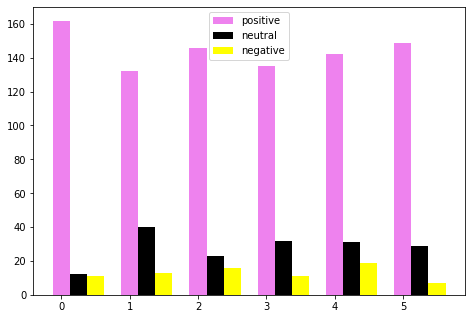

In [19]:
##MAKING A BAR PLOT HOW MANY INSTANCES ARE POSITIVE, NEUTRAL AND NEGATIVE IN EACH FEATURE
# 0-TEACHING 1-COURSECONTENT,2-EXAMINATION,3-LABWORK,4-LIBRARY,5-EXTRACURRICULAR

import numpy as np
import matplotlib.pyplot as plt
bargraph=[[162,132,146,135,142,149], [12,40,23,32,31,29],[11,13,16,11,19,7]]
X=np.arange(6)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(X+ 0.00, bargraph[0],color='violet',width=0.25)
ax.bar(X+ 0.25, bargraph[1],color='black',width=0.25)
ax.bar(X+ 0.50, bargraph[2],color='yellow',width=0.25)

ax.legend(labels=['positive','neutral','negative'])

In [20]:
##TEST DATA
data1=pd.read_csv('C:\\Users\\SUSHMI REDDY\\Desktop\\feedback_testdata.csv')
print(data1.isnull().sum())

teaching              0
coursecontent         0
examination           0
labwork               0
library_facilities    0
extracurricular       0
dtype: int64


(185, 2) (185,)
Accuracy score 0.7857142857142857
confusion matrix [[ 0  0  0]
 [ 0  0  0]
 [ 3  9 44]]
classification report               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00         0
           1       1.00      0.79      0.88        56

    accuracy                           0.79        56
   macro avg       0.33      0.26      0.29        56
weighted avg       1.00      0.79      0.88        56



C:\Users\SUSHMI REDDY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


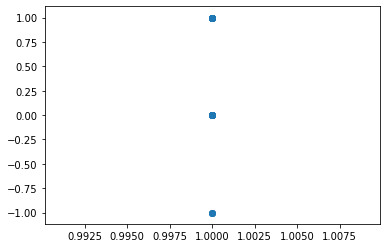

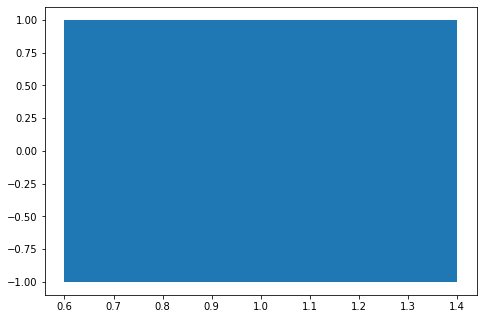

In [33]:
##NOW USING SVM WE TRAIN EACH FEATURE AND VISUALIZE USING SCATTER PLOT AND BAR GRAPH
## this is for teaching 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
x=df.loc[:,'polarity_teaching':'subjectivity_teaching']
y=data1.loc[:,'teaching']
print(x.shape,y.shape)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30)
obj=SVC(kernel="linear")
obj.fit(xtrain,ytrain)
pred=obj.predict(xtest)
print("Accuracy score",accuracy_score(pred,ytest))
print("confusion matrix",confusion_matrix(pred,ytest))
print("classification report",classification_report(pred,ytest))

import matplotlib.pyplot as plt
plt.scatter(pred,ytest)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(pred,ytest)
plt.show()

(185, 2) (185,)
Accuracy score 0.7857142857142857
confusion matrix [[ 0  0  0]
 [ 0  0  0]
 [ 6  6 44]]
classification report               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00         0
           1       1.00      0.79      0.88        56

    accuracy                           0.79        56
   macro avg       0.33      0.26      0.29        56
weighted avg       1.00      0.79      0.88        56



C:\Users\SUSHMI REDDY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


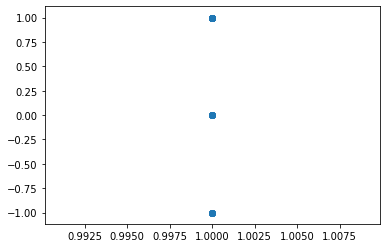

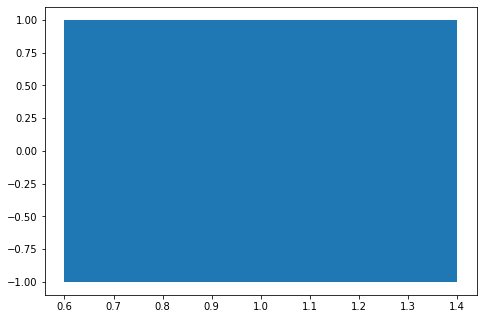

In [34]:
##this is for feature coursecontent
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
x=df.loc[:,'polarity_coursecontent':'subjectivity_coursecontent']
y=data1.loc[:,'coursecontent']
print(x.shape,y.shape)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30)
obj=SVC(kernel="linear")
obj.fit(xtrain,ytrain)
pred=obj.predict(xtest)
print("Accuracy score",accuracy_score(pred,ytest))
print("confusion matrix",confusion_matrix(pred,ytest))
print("classification report",classification_report(pred,ytest))

import matplotlib.pyplot as plt
plt.scatter(pred,ytest)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(pred,ytest)
plt.show()

(185, 2) (185,)
Accuracy score 0.6964285714285714
confusion matrix [[ 0  0  0]
 [ 0  0  0]
 [ 7 10 39]]
classification report               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00         0
           1       1.00      0.70      0.82        56

    accuracy                           0.70        56
   macro avg       0.33      0.23      0.27        56
weighted avg       1.00      0.70      0.82        56



C:\Users\SUSHMI REDDY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


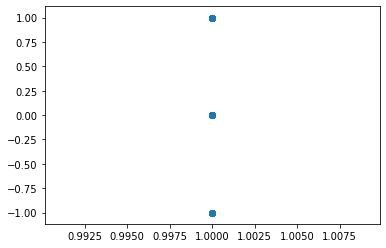

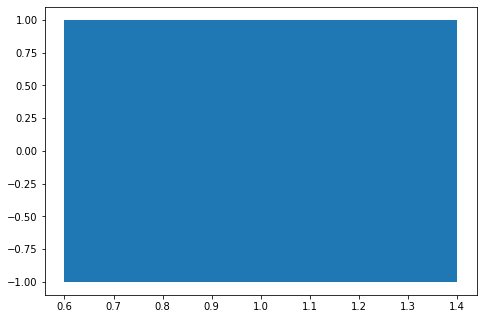

In [36]:
##this is for feature examination
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
x=df.loc[:,'polarity_Examination':'subjectivity_Examination']
y=data1.loc[:,'examination']
print(x.shape,y.shape)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30)
obj=SVC(kernel="linear")
obj.fit(xtrain,ytrain)
pred=obj.predict(xtest)
print("Accuracy score",accuracy_score(pred,ytest))
print("confusion matrix",confusion_matrix(pred,ytest))
print("classification report",classification_report(pred,ytest))

import matplotlib.pyplot as plt
plt.scatter(pred,ytest)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(pred,ytest)
plt.show()

(185, 2) (185,)
Accuracy score 0.6964285714285714
confusion matrix [[ 0  0  1]
 [ 0  0  0]
 [10  6 39]]
classification report               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.00      0.00      0.00         0
           1       0.97      0.71      0.82        55

    accuracy                           0.70        56
   macro avg       0.33      0.24      0.27        56
weighted avg       0.96      0.70      0.81        56



C:\Users\SUSHMI REDDY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


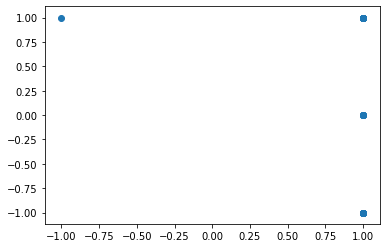

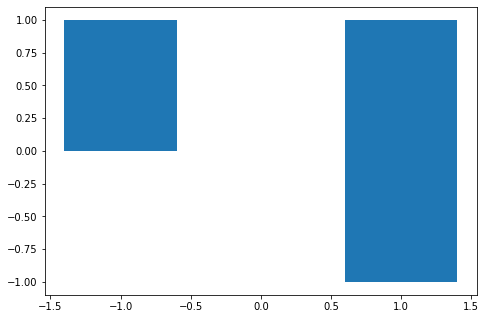

In [37]:
##this is for feature labwork
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
x=df.loc[:,'polarity_labwork':'subjectivity_labwork']
y=data1.loc[:,'labwork']
print(x.shape,y.shape)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30)
obj=SVC(kernel="linear")
obj.fit(xtrain,ytrain)
pred=obj.predict(xtest)
print("Accuracy score",accuracy_score(pred,ytest))
print("confusion matrix",confusion_matrix(pred,ytest))
print("classification report",classification_report(pred,ytest))

import matplotlib.pyplot as plt
plt.scatter(pred,ytest)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(pred,ytest)
plt.show()

(185, 2) (185,)
Accuracy score 0.6607142857142857
confusion matrix [[ 0  0  0]
 [ 0  0  0]
 [10  9 37]]
classification report               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00         0
           1       1.00      0.66      0.80        56

    accuracy                           0.66        56
   macro avg       0.33      0.22      0.27        56
weighted avg       1.00      0.66      0.80        56



C:\Users\SUSHMI REDDY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


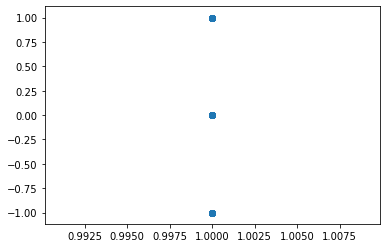

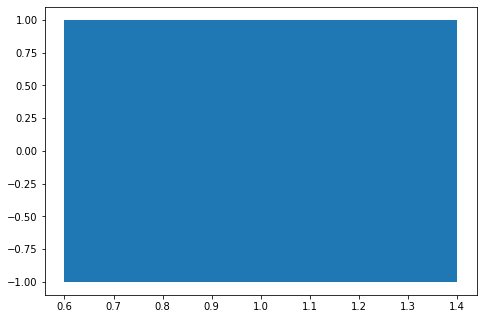

In [39]:
##this is for feature library facilities
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
x=df.loc[:,'polarity_library':'subjectivity_library']
y=data1.loc[:,'library_facilities']
print(x.shape,y.shape)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30)
obj=SVC(kernel="linear")
obj.fit(xtrain,ytrain)
pred=obj.predict(xtest)
print("Accuracy score",accuracy_score(pred,ytest))
print("confusion matrix",confusion_matrix(pred,ytest))
print("classification report",classification_report(pred,ytest))

import matplotlib.pyplot as plt
plt.scatter(pred,ytest)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(pred,ytest)
plt.show()

(185, 2) (185,)
Accuracy score 0.7857142857142857
confusion matrix [[ 0  0  0]
 [ 0  0  0]
 [ 5  7 44]]
classification report               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00         0
           1       1.00      0.79      0.88        56

    accuracy                           0.79        56
   macro avg       0.33      0.26      0.29        56
weighted avg       1.00      0.79      0.88        56



C:\Users\SUSHMI REDDY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


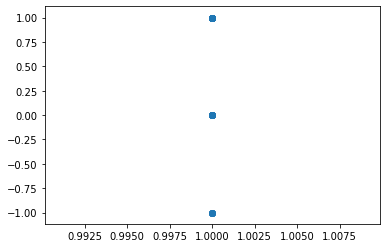

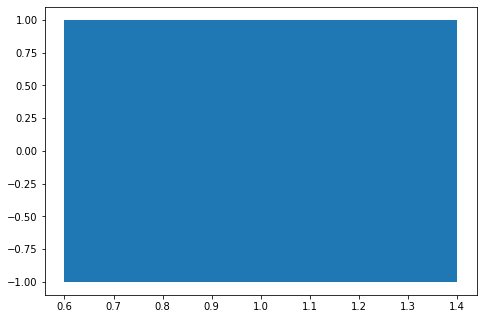

In [40]:
##this is for feature extracurricular
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
x=df.loc[:,'polarity_extracurricular':'subjectivity_extracurricular']
y=data1.loc[:,'extracurricular']
print(x.shape,y.shape)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30)
obj=SVC(kernel="linear")
obj.fit(xtrain,ytrain)
pred=obj.predict(xtest)
print("Accuracy score",accuracy_score(pred,ytest))
print("confusion matrix",confusion_matrix(pred,ytest))
print("classification report",classification_report(pred,ytest))

import matplotlib.pyplot as plt
plt.scatter(pred,ytest)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(pred,ytest)
plt.show()